<a href="https://colab.research.google.com/github/AkshaySingh-Github/Sentiment-Analysis-on-3rd-wave-of-covid-/blob/main/Sentiment_Analysis_usingTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Twitter

In [1]:
import tweepy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import nltk

In [2]:
# Variables that contains the user specific credentials to access Twitter API
# Please create yours by going to https://developer.twitter.com/en 
access_token = "1219967415058096128-Pv80kqvAn6ZvbyzPSEPwv3VGqfS3M3"
access_token_secret = "DwjqU1UqwpQuN3XZ7z4jlDGiXp7SMh9L7ImTYDSdIbwOZ"
consumer_key = "KWAM7YcaKDukZJ9ibrhnWpaK2"
consumer_secret = "YB6k4fspIscoE7lNihdrcSyuDvQ02pjLLhloxc8GpaGDTxvFm5"

In [3]:
# Connecting to twitter using user credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

# Searching about any keyword in all the latest tweets from delhi
tweets_data=api.search('Covid third wave',count=100, lang='en', include_rts=False, tweet_mode="extended",
                      geocode="28.7041,77.1025,10km", )
print ("number of tweets found: "+ str(len(tweets_data)))


# Creating an empty data frame to store the tweets
tweets = pd.DataFrame()

# Extracting the tweet metadata
for status in tweets_data:
    tweets=tweets.append(status._json, ignore_index=True)

number of tweets found: 100


In [4]:
# Looking at the data collected
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,metadata,place,retweet_count,retweeted,source,truncated,user,retweeted_status,possibly_sensitive,extended_entities
0,None,None,Sun Jun 27 23:06:45 +0000 2021,"[0, 216]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,@ArvindKejriwal @PMOIndia @narendramodi @msiso...,None,1.409287e+18,1409287113351196679,ArvindKejriwal,None,None,4.05427e+08,405427035,0.0,en,"{'iso_language_code': 'en', 'result_type': 're...",None,0.0,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 895676682, 'id_str': '895676682', 'name...",NaN,NaN,NaN
1,None,None,Sun Jun 27 19:36:35 +0000 2021,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @hemantrajora_: Third Covid-19 wave will co...,None,1.409234e+18,1409234221944557572,None,None,None,None,None,0.0,en,"{'iso_language_code': 'en', 'result_type': 're...",None,51.0,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 4632853831, 'id_str': '4632853831', 'na...",{'created_at': 'Sun Jun 27 05:25:09 +0000 2021...,NaN,NaN
2,None,None,Sun Jun 27 19:21:01 +0000 2021,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @AlgoBoffin: Covid third wave: Maharashtra ...,None,1.409230e+18,1409230306545000448,None,None,None,None,None,0.0,en,"{'iso_language_code': 'en', 'result_type': 're...",None,2.0,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 2261364044, 'id_str': '2261364044', 'na...",{'created_at': 'Sun Jun 27 19:11:17 +0000 2021...,NaN,NaN
3,None,None,Sun Jun 27 19:13:50 +0000 2021,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @hemantrajora_: Third Covid-19 wave will co...,None,1.409228e+18,1409228497302786048,None,None,None,None,None,0.0,en,"{'iso_language_code': 'en', 'result_type': 're...",None,51.0,0.0,"<a href=""http://twitter.com/download/iphone"" r...",0.0,"{'id': 94291304, 'id_str': '94291304', 'name':...",{'created_at': 'Sun Jun 27 05:25:09 +0000 2021...,NaN,NaN
4,None,None,Sun Jun 27 19:12:12 +0000 2021,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",0.0,0.0,RT @AlgoBoffin: Covid third wave: Maharashtra ...,None,1.409228e+18,1409228085560438784,None,None,None,None,None,0.0,en,"{'iso_language_code': 'en', 'result_type': 're...",None,2.0,0.0,"<a href=""http://twitter.com/download/android"" ...",0.0,"{'id': 1091320467875483648, 'id_str': '1091320...",{'created_at': 'Sun Jun 27 19:11:17 +0000 2021...,NaN,NaN


In [5]:
# Looking at only the tweet texts
tweets['full_text'].unique()

array(['@ArvindKejriwal @PMOIndia @narendramodi @msisodia @drharshvardhan brace yourself for third wave as most of the people is not following covid appropriate behaviour outside and almost all markets are overcrowded.......',
       'RT @hemantrajora_: Third Covid-19 wave will come \n\nColumbia and  Indonesia have seen biggest one day spike in COVID cases in last 24 hours.…',
       'RT @AlgoBoffin: Covid third wave: Maharashtra expects 50 lakh cases in third Covid wave, works to stock up on essentials | Mumbai News - Ti…',
       'Covid third wave: Maharashtra expects 50 lakh cases in third Covid wave, works to stock up on essentials | Mumbai News - Times of India https://t.co/FoC275OWsK',
       "Covid third wave likely to hit India late: Govt's expert panel chief NK Arora on ICMR study - Mint https://t.co/RVHuvVY0bK",
       'Coronavirus News LIVE Update: Maha Logs 9,974 New Cases, 143 Deaths; Mumbai Reports 739 Infections - News18 https://t.co/fCfTrEITay',
       'RT @ShivAroor: A

#Sentiment analysis
Using bag of words model, finding the sentiment of every tweet found

In [6]:
PositiveWords=pd.read_table('/content/drive/MyDrive/Data/positive-words.txt',encoding='latin-1')
NegativeWords=pd.read_table('/content/drive/MyDrive/Data/negative-words.txt',encoding='latin-1')

In [7]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re
    
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
    # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
    #print('Final Positive Score:',PositiveScore)
    #print('Final Negative Score:',NegativeScore)
    #print('Overall Score:',PositiveScore-NegativeScore)
    
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral'
    
    else:
        OverallSentiment='Negative'
        
    return(OverallSentiment)

In [8]:
# Calling sentiment score function for every tweet
tweets['Sentiment']=tweets['full_text'].apply(ComputeSentimentScore)

# Printing sample rows to understand
tweets[['full_text', 'Sentiment']].head()

,full_text,Sentiment
0,@ArvindKejriwal @PMOIndia @narendramodi @msiso...,Positive
1,RT @hemantrajora_: Third Covid-19 wave will co...,Neutral
2,RT @AlgoBoffin: Covid third wave: Maharashtra ...,Positive
3,RT @hemantrajora_: Third Covid-19 wave will co...,Neutral
4,RT @AlgoBoffin: Covid third wave: Maharashtra ...,Positive


# Visualizing the overall sentiment distribution

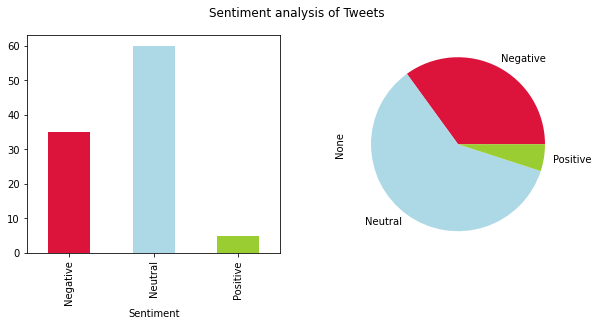

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Tweets")

# Grouping the data
GroupedData=tweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])

In [10]:
# Extracting only the Tweet text
Tweet_Texts=tweets['full_text'].values

# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)

In [11]:
# Observing the tweets text for junk
print(Tweets_String)

['@ArvindKejriwal @PMOIndia @narendramodi @msisodia @drharshvardhan brace yourself for third wave as most of the people is not following covid appropriate behaviour outside and almost all markets are overcrowded.......'
 'RT @hemantrajora_: Third Covid-19 wave will come \n\nColumbia and  Indonesia have seen biggest one day spike in COVID cases in last 24 hours.…'
 'RT @AlgoBoffin: Covid third wave: Maharashtra expects 50 lakh cases in third Covid wave, works to stock up on essentials | Mumbai News - Ti…'
 'RT @hemantrajora_: Third Covid-19 wave will come \n\nColumbia and  Indonesia have seen biggest one day spike in COVID cases in last 24 hours.…'
 'RT @AlgoBoffin: Covid third wave: Maharashtra expects 50 lakh cases in third Covid wave, works to stock up on essentials | Mumbai News - Ti…'
 'Covid third wave: Maharashtra expects 50 lakh cases in third Covid wave, works to stock up on essentials | Mumbai News - Times of India https://t.co/FoC275OWsK'
 "Covid third wave likely to hit Indi

# Data Preprocessing: Cleaning the text

In [12]:
# Tweet Text cleaning
import re

# Converting the whole text to lowercase
Tweet_Texts_Cleaned = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)


# Deleting any word which is less than 4-characters mostly those are stopwords
Tweet_Texts_Cleaned= re.sub(r'\b\w{1,3}\b', '', Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned

' brace yourself third wave most people following covid appropriate behaviour outside almost markets overcrowded third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news times india covid third wave likely india late govt expert panel chief arora icmr study mint third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours coronavirus news live update maha logs cases deaths mumbai reports infections news third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours third covid wave will come ncolumbi

# Generating the wordcloud

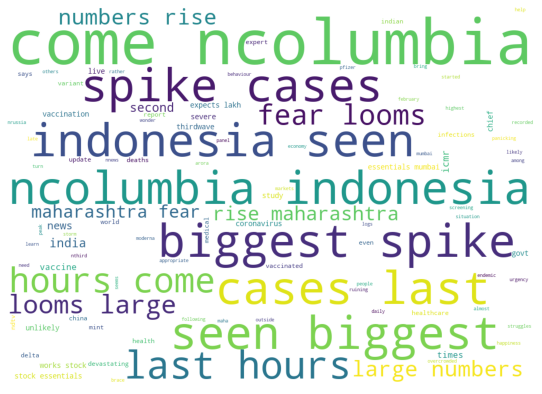

In [13]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options

# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['corona','corona_virus','virus','covid','rt','day','https','will','third_wave','third','wave']

wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=720
                          ).generate(Tweet_Texts_Cleaned)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()

# Bigram/Trigram

In [14]:
import re
import textblob
import nltk

# Data Preprocessing: Cleaning the text

In [15]:
# Converting the whole text to lowercase
Tweet_Texts_Cleaned_bi = Tweets_String.lower()

# Removing the twitter usernames from tweet string
Tweet_Texts_Cleaned_bi=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)

# Removing the URLS from the tweet string
Tweet_Texts_Cleaned_bi=re.sub(r'http\S+', ' ', Tweet_Texts_Cleaned)


# Deleting everything which is not characters
#Tweet_Texts_Cleaned_bi = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)

# Stripping extra spaces in the text
Tweet_Texts_Cleaned_bi= re.sub(r' +', ' ', Tweet_Texts_Cleaned)

Tweet_Texts_Cleaned_bi

' brace yourself third wave most people following covid appropriate behaviour outside almost markets overcrowded third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news covid third wave maharashtra expects lakh cases third covid wave works stock essentials mumbai news times india covid third wave likely india late govt expert panel chief arora icmr study mint third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours coronavirus news live update maha logs cases deaths mumbai reports infections news third covid wave will come ncolumbia indonesia have seen biggest spike covid cases last hours third covid wave will come ncolumbi

In [16]:
tweetblob= textblob.TextBlob(Tweet_Texts_Cleaned)

In [17]:
NounPhrases= tweetblob.noun_phrases

In [18]:
NounPhrases

WordList(['appropriate behaviour', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'hours covid', 'wave maharashtra', 'lakh cases', 'covid wave', 'stock essentials mumbai news', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'hours covid', 'wave maharashtra', 'lakh cases', 'covid wave', 'stock essentials mumbai news covid', 'wave maharashtra', 'lakh cases', 'covid wave', 'stock essentials mumbai news times india covid', 'likely india', 'late govt expert panel chief arora icmr study mint', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'hours coronavirus news', 'update maha logs cases deaths mumbai reports infections news', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'covid wave', 'ncolumbia indonesia', 'spike covid cases', 'covid wave', 'ncolumbia indonesia', 'spike cov

In [19]:
NewNounList=[]
for word in NounPhrases:
  NewNounList.append (word.replace(" ","_"))
  NewNounString=''.join(NewNounList)
  print(NewNounString)

appropriate_behaviour
appropriate_behaviourcovid_wave
appropriate_behaviourcovid_wavencolumbia_indonesia
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_cases
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covid
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtra
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtralakh_cases
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtralakh_casescovid_wave
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtralakh_casescovid_wavestock_essentials_mumbai_news
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtralakh_casescovid_wavestock_essentials_mumbai_newscovid_wave
appropriate_behaviourcovid_wavencolumbia_indonesiaspike_covid_caseshours_covidwave_maharashtralakh_casescovid_wavestock_essentials_mumbai

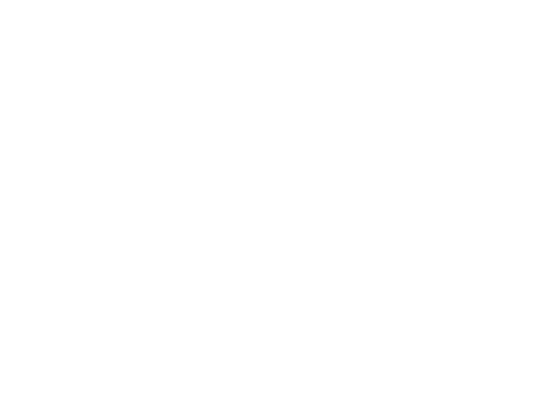

In [20]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['corona','corona_virus','virus','covid','rt','day','https','will','third_wave','third','wave']

wordcloudimage = WordCloud(max_words=1000,max_font_size=200,font_step=2,stopwords=customStopwords, background_color='white',
                           width=1000,height=720 ).generate(NewNounString)

plt.figure(figsize=(15,7))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()